<a href="https://colab.research.google.com/github/nohjuhyeon/study_data_analytics/blob/main/docs/pandas/10_1_pandas_usefuls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연속형을 범주형으로 변환

In [1]:
import pandas as pd
import numpy as np
# 샘플 데이터 생성 (이상치 포함)
df_data = pd.DataFrame({
    'Age_20_50': np.random.randint(20, 50, size=100).tolist(),  # 대부분 20세에서 70세 사이이나, 몇몇 이상치 포함
    'Age_outlier': np.random.randint(20, 70, size=95).tolist() + [9, 75, 80, 85, 90]  # 대부분 20세에서 70세 사이이나, 몇몇 이상치 포함
})
df_data[:2]

,Age_20_50,Age_outlier
0,49,20
1,38,69


In [ ]:
df_data.shape

(100, 2)

### without outlier

<Axes: xlabel='Age_20_50', ylabel='count'>

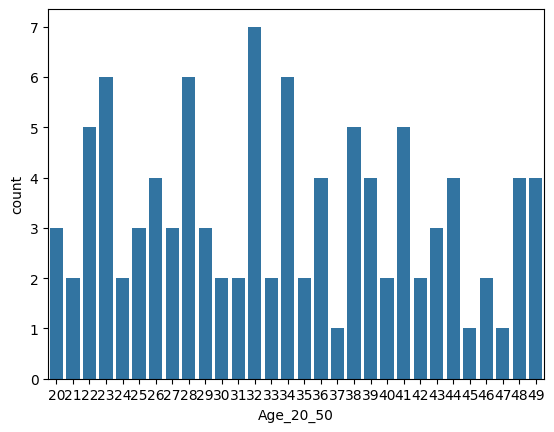

In [ ]:
import seaborn as sns
sns.countplot(data=df_data,x='Age_20_50')

In [ ]:
bins = [19,29,39,49]
labels = ['20-29','30-39','40-49']
df_data['Age_20_50_category']=pd.cut(x=df_data['Age_20_50'],bins=bins,labels=labels)
# df_data[:10]
df_data['Age_20_50_category'].value_counts()

20-29    37
30-39    35
40-49    28
Name: Age_20_50_category, dtype: int64

In [ ]:
df_data['Age_20_50'].value_counts().sort_index()

20    3
21    2
22    5
23    6
24    2
25    3
26    4
27    3
28    6
29    3
30    2
31    2
32    7
33    2
34    6
35    2
36    4
37    1
38    5
39    4
40    2
41    5
42    2
43    3
44    4
45    1
46    2
47    1
48    4
49    4
Name: Age_20_50, dtype: int64

### with outlier

In [ ]:
bins = [0,19,29,39,49, 100]
labels = ['-20','20-29','30-39','40-49','50+']
df_data['Age_outlier_100']=pd.cut(x=df_data['Age_outlier'],bins=bins,labels=labels)
df_data[:10]
df_data['Age_outlier_100'].value_counts()


50+      54
40-49    20
20-29    15
30-39    10
-20       1
Name: Age_outlier_100, dtype: int64

## read excel file with sheets

In [ ]:
df_OWG = pd.read_excel('OneWord_Game.xlsx', sheet_name = None)
df_OWG

In [16]:
df_sheets = []
for sheet_name, df in df_OWG.items():
  df_sheets.append(df)
  print(f'{sheet_name} {type(df)}')
  pass

2월 <class 'pandas.core.frame.DataFrame'>
1월 <class 'pandas.core.frame.DataFrame'>
12월 <class 'pandas.core.frame.DataFrame'>


In [13]:
len(df_sheets)

3

In [ ]:
df_sheets[2][:2]